# Airline Satisfaction Analysis

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

plt.rcParams['figure.figsize'] = [10, 6]

## Data Import and Overview

In [2]:
df = pd.read_csv('./data/airline_passenger_satisfaction.csv')

In [3]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [6]:
df.describe(include='O')

,Gender,Customer Type,Type of Travel,Class,satisfaction
count,103904,103904,103904,103904,103904
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52727,84923,71655,49665,58879


In [7]:
df.isna().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

## Data Cleaning

First, we should get rid of the column "Unnamed: 0", as we do not need it. 

In [8]:
df = df.drop(columns=['Unnamed: 0'])

In [11]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


We also have a column, 'Arrival Delay in Minutes'. Let's take a look at the distribution to determine if we should impute the value, or not. 

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Count'>

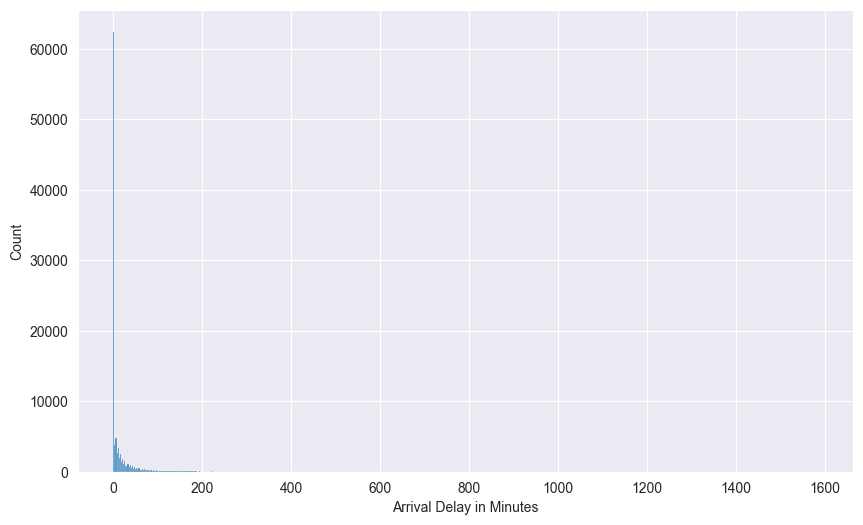

In [20]:
sns.histplot(data=df, x='Arrival Delay in Minutes')

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

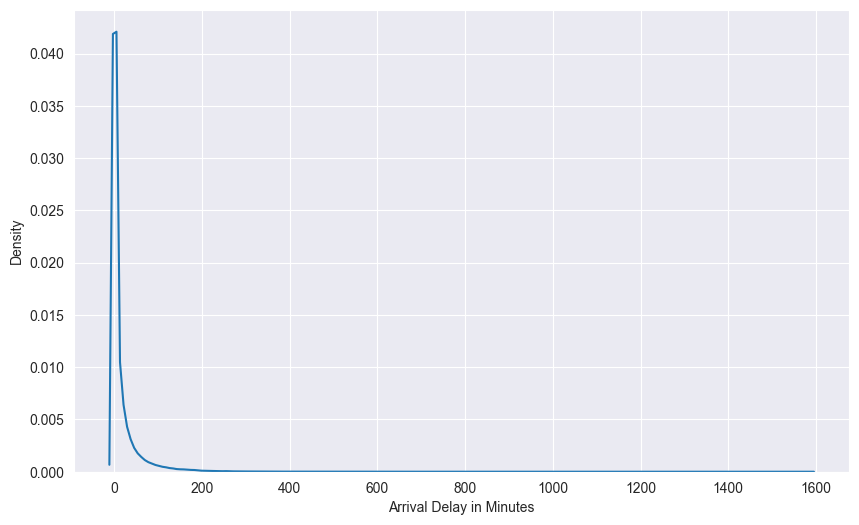

In [21]:
sns.kdeplot(data=df, x='Arrival Delay in Minutes')

Looking at the histogram and the KDE plot, if it hard to tell what is going on. We can see that the majority of the values are on the left side, but itis extremely zoomed out, due to the extreme values on the right side (that we cannot see).

we also see the majority of the dataset is 0, meaning most flights do not have a delay. 

Let's use a boxplot to better see the distriubtion

<Axes: xlabel='Arrival Delay in Minutes'>

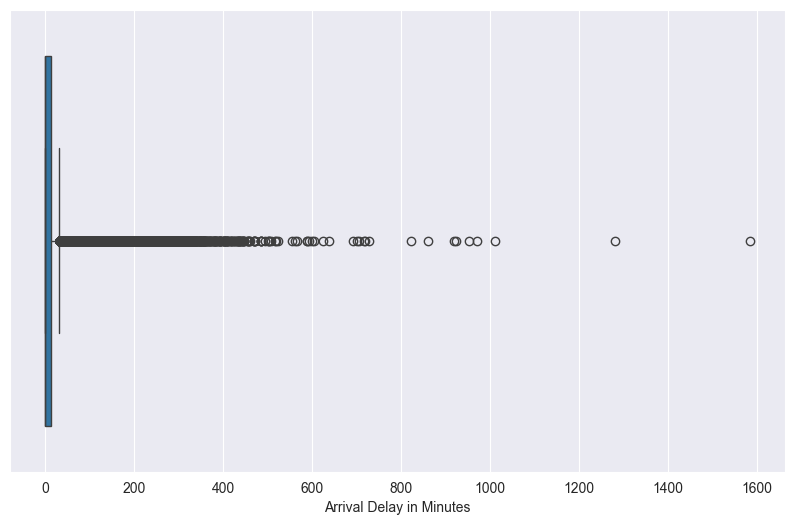

In [22]:
sns.boxplot(data=df, x="Arrival Delay in Minutes")

In [24]:
df['Arrival Delay in Minutes'].describe()

count    103594.000000
mean         15.178678
std          38.698682
min           0.000000
25%           0.000000
50%           0.000000
75%          13.000000
max        1584.000000
Name: Arrival Delay in Minutes, dtype: float64

Due to the left skewness of the graph, and that there is no evidence that any of these outliers are false data, we will impute the missing values with the median value (which is 0, assuming no delay). We will also add a column that indicates that the value was imputed, so that our model will be able to know what data was imputed. 

In [27]:
df['Arrival Delayed Missing'] = df['Arrival Delay in Minutes'].isna().astype(int)

In [28]:
df['Arrival Delayed Missing'].value_counts()

Arrival Delayed Missing
0    103594
1       310
Name: count, dtype: int64

In [29]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median())

In [30]:
df.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Arrival Delayed Missing              0
dtype: int64

We now have no missing values in the data set. To continue cleaning though, lets rename the columns for better usability. 

In [40]:
df.columns = df.columns.str.replace(r'[ /-]', '_', regex=True).str.lower()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  int64  
 1   gender                             103904 non-null  object 
 2   customer_type                      103904 non-null  object 
 3   age                                103904 non-null  int64  
 4   type_of_travel                     103904 non-null  object 
 5   class                              103904 non-null  object 
 6   flight_distance                    103904 non-null  int64  
 7   inflight_wifi_service              103904 non-null  int64  
 8   departure_arrival_time_convenient  103904 non-null  int64  
 9   ease_of_online_booking             103904 non-null  int64  
 10  gate_location                      103904 non-null  int64  
 11  food_and_drink                     1039

## Feature Engineering and Categorical Typing

Let's create some columns that may help in our analysis. 

### Age Groups

In [54]:
bins = [df['age'].min()-1, 13, 20, 25, 65, df['age'].max()+1]
labels = ['child', 'teenager', 'young adult', 'adult', 'senior']

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [61]:
df['age_group'].value_counts(normalize=True)

age_group
adult          0.763599
young adult    0.096262
teenager       0.057005
senior         0.045696
child          0.037438
Name: proportion, dtype: float64

### Delay Groups

In [64]:
bins = [
    -float("inf"),  # early or on time
    1,
    16,
    46,
    121,
    float("inf")
]

labels = [
    "on time",
    "small delay", 
    "medium delay",
    "large delay", 
    "very large delay"
]

df['departure_delay_group'] = pd.cut(df['departure_delay_in_minutes'], bins=bins, labels=labels)
df['arrival_delay_group'] = pd.cut(df['arrival_delay_in_minutes'], bins=bins, labels=labels)

In [66]:
df['departure_delay_group'].value_counts(normalize=True)

departure_delay_group
on time             0.593009
small delay         0.192687
medium delay        0.120582
large delay         0.069545
very large delay    0.024176
Name: proportion, dtype: float64

In [65]:
df['arrival_delay_group'].value_counts(normalize=True)

arrival_delay_group
on time             0.584001
small delay         0.196576
medium delay        0.124759
large delay         0.069882
very large delay    0.024782
Name: proportion, dtype: float64

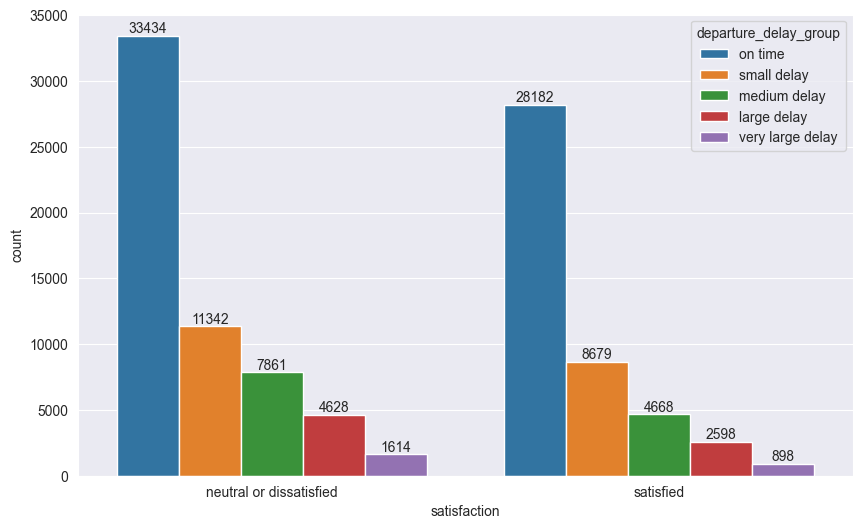

In [70]:
ax = sns.countplot(data=df, x='satisfaction', hue='departure_delay_group')
for container in ax.containers:
    ax.bar_label(container)

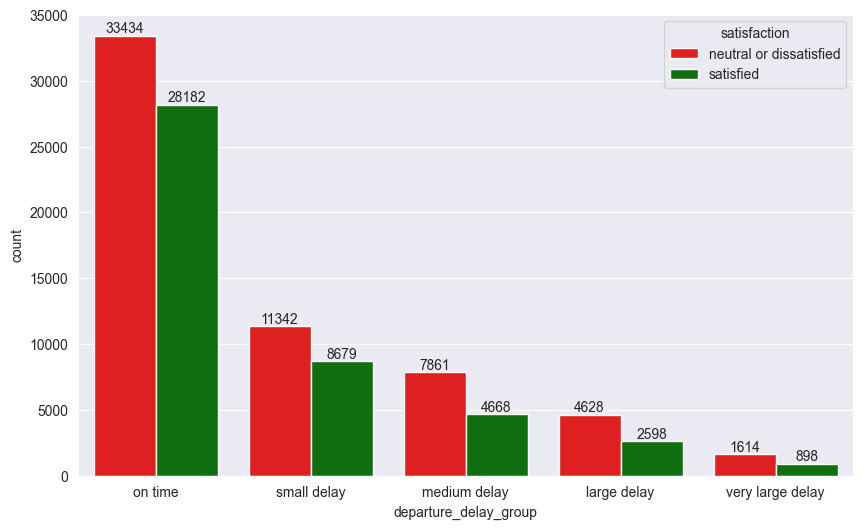

In [73]:
ax = sns.countplot(data=df, x='departure_delay_group', hue='satisfaction', palette=['red', 'green'])
for container in ax.containers:
    ax.bar_label(container)

In [74]:
df['satisfaction'].value_counts(normalize=True)

satisfaction
neutral or dissatisfied    0.566667
satisfied                  0.433333
Name: proportion, dtype: float64